In [2]:
import pandas as pd
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sb
import statsmodels.api as sm
import scipy.stats as sp
import statsmodels.stats.diagnostic as ssd
#import our data for correlatin analys in python with dataframe.

In [3]:
df=pd.DataFrame(pd.read_csv ('C:/Users/borsh/OneDrive/Рабочий стол/BI/projects/ForestlyActivitiesProject/scripts/data-1759582857171.csv'))
df.head(10)     

,sum,year
0,1.926767e+07,2015
1,1.960574e+07,2016
2,1.895178e+07,2017
3,1.413270e+07,2018
4,1.788660e+07,2019
5,1.677300e+07,2020
6,1.666690e+07,2021
7,1.508510e+07,2022
8,1.525210e+07,2023
9,1.488580e+07,2024


Show the plot to look at the data 

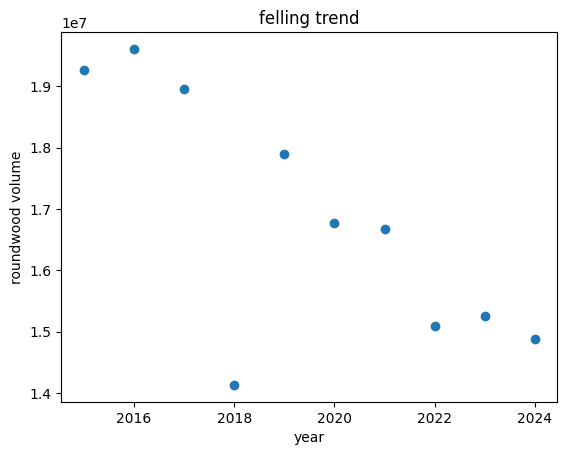

In [4]:

plt.scatter(x=df['year'], y=df['sum'])
plt.title('felling trend')
plt.xlabel('year')
plt.ylabel('roundwood volume')
plt.show()

## Build the regression to see the relation 

In [5]:

x=sm.add_constant(df['year'])
y=df['sum']
ols_basic= sm.OLS(y,x).fit()
print(ols_basic.summary())

                            OLS Regression Results                            
Dep. Variable:                    sum   R-squared:                       0.578
Model:                            OLS   Adj. R-squared:                  0.526
Method:                 Least Squares   F-statistic:                     10.98
Date:                Thu, 30 Oct 2025   Prob (F-statistic):             0.0107
Time:                        17:43:01   Log-Likelihood:                -154.41
No. Observations:                  10   AIC:                             312.8
Df Residuals:                       8   BIC:                             313.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        1.03e+09   3.06e+08      3.368      0.0

p-value < 0.05 our model is relevant, zero hypothize is rejected 

In [6]:
#let's look at correlation 
df.corr()

,sum,year
sum,1.000000,-0.760529
year,-0.760529,1.000000


High correlation between roundwood volume and year 

## Get a confidence interval

In [7]:
pred = ols_basic.get_prediction(x)
pred_summary = pred.summary_frame(alpha = 0.5)
print(pred_summary[['mean','mean_ci_lower','mean_ci_upper']])

           mean  mean_ci_lower  mean_ci_upper
0  1.910774e+07   1.853683e+07   1.967865e+07
1  1.860618e+07   1.812198e+07   1.909038e+07
2  1.810463e+07   1.769741e+07   1.851185e+07
3  1.760307e+07   1.725654e+07   1.794960e+07
4  1.710152e+07   1.678973e+07   1.741330e+07
5  1.659996e+07   1.628817e+07   1.691175e+07
6  1.609841e+07   1.575187e+07   1.644494e+07
7  1.559685e+07   1.518963e+07   1.600407e+07
8  1.509529e+07   1.461109e+07   1.557949e+07
9  1.459374e+07   1.402282e+07   1.516465e+07


## Prediction interval 

In [8]:
pred = ols_basic.get_prediction(x)
pred_summary = pred.summary_frame(alpha = 0.5)
print(pred_summary[['mean','obs_ci_lower','obs_ci_upper']])

           mean  obs_ci_lower  obs_ci_upper
0  1.910774e+07  1.798104e+07  2.023444e+07
1  1.860618e+07  1.752084e+07  1.969153e+07
2  1.810463e+07  1.705137e+07  1.915788e+07
3  1.760307e+07  1.657176e+07  1.863438e+07
4  1.710152e+07  1.608135e+07  1.812168e+07
5  1.659996e+07  1.557980e+07  1.762012e+07
6  1.609841e+07  1.506709e+07  1.712972e+07
7  1.559685e+07  1.454359e+07  1.665011e+07
8  1.509529e+07  1.400995e+07  1.618064e+07
9  1.459374e+07  1.346703e+07  1.572044e+07


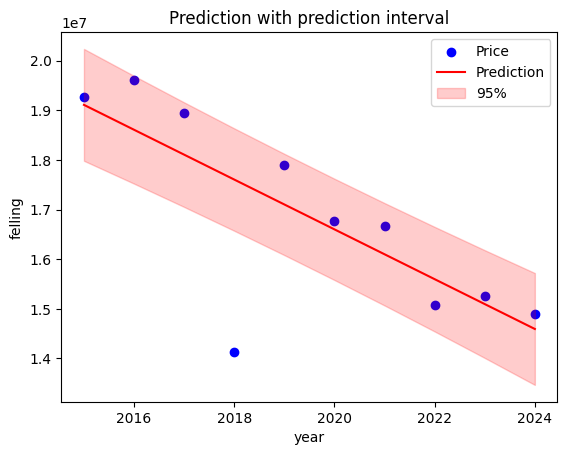

In [9]:
plt.scatter(df['year'],df['sum'],color ='blue',label = 'Price')
plt.plot(x['year'],pred_summary['mean'],color ='red', label = 'Prediction')
plt.fill_between(x['year'], pred_summary['obs_ci_lower'], pred_summary['obs_ci_upper'],color = 'red', alpha =0.2, label = '95%')
plt.xlabel('year')
plt.ylabel('felling')
plt.title('Prediction with prediction interval')
plt.legend()
plt.show()

In [10]:
X=sm.add_constant((pd.concat([df['year'],pd.Series([2025,2026,2027])])))
prediction= ols_basic.get_prediction(X)
forecast=prediction.summary_frame(alpha=0.05)
forecast.index = X[0]
print(forecast[['mean','mean_ci_lower','mean_ci_upper','obs_ci_lower','obs_ci_upper']])

              mean  mean_ci_lower  mean_ci_upper  obs_ci_lower  obs_ci_upper
0                                                                           
2015  1.910774e+07   1.724399e+07   2.097149e+07  1.542961e+07  2.278587e+07
2016  1.860618e+07   1.702551e+07   2.018686e+07  1.506307e+07  2.214929e+07
2017  1.810463e+07   1.677525e+07   1.943401e+07  1.466626e+07  2.154299e+07
2018  1.760307e+07   1.647182e+07   1.873433e+07  1.423635e+07  2.096980e+07
2019  1.710152e+07   1.608369e+07   1.811935e+07  1.377119e+07  2.043184e+07
2020  1.659996e+07   1.558213e+07   1.761779e+07  1.326964e+07  1.993029e+07
2021  1.609841e+07   1.496715e+07   1.722966e+07  1.273168e+07  1.946513e+07
2022  1.559685e+07   1.426747e+07   1.692623e+07  1.215849e+07  1.903521e+07
2023  1.509529e+07   1.351462e+07   1.667597e+07  1.155218e+07  1.863840e+07
2024  1.459374e+07   1.272999e+07   1.645749e+07  1.091561e+07  1.827187e+07
2025  1.409218e+07   1.192599e+07   1.625837e+07  1.025194e+07  1.793242e+07